<a href="https://colab.research.google.com/github/Sriku010203/EDA-on-Flight-Price-Prediction/blob/master/covid19_CTScan_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# all done excepth hyperparameter tuning, ask supra suraj how to find learning rate in keras cnn, and how to do hyperparameter tuning
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
from keras.optimizers import Adam
from keras.utils import np_utils
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
img_rows, img_cols = 300, 300
img_channels = 1


In [ ]:
path1 = '/content/drive/MyDrive/covid_CTScan_dataset/CT_NonCOVID'
path2 = '/content/drive/MyDrive/covid_CTScan_dataset/CT_NonCOVID_new'

listing = os.listdir(path1) 
num_samples=size(listing)
print(num_samples) #349 covid, 397 non covid = 746 total

for file in listing:
    im = Image.open(path1 + '/' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    #need to do some more processing here           
    gray.save(path2 +'//' +  file, "JPEG")

397


In [ ]:
# resized data path
path_covid = '/content/drive/MyDrive/covid_CTScan_dataset/CT_COVID_new'
path_nonCovid = '/content/drive/MyDrive/covid_CTScan_dataset/CT_NonCOVID_new'

In [ ]:
# Covid data
imlist_covid = os.listdir(path_covid)

im1_covid = array(Image.open(path_covid + '//'+ imlist_covid[0]))
m,n = im1_covid.shape[0:2]
imnbr = len(imlist_covid)

immatrix_covid = array([array(Image.open(path_covid + '//'+ im2)).flatten()
              for im2 in imlist_covid],'f')

# Non Covid data
imlist_nonCovid = os.listdir(path_nonCovid)

im1_nonCovid = array(Image.open(path_nonCovid + '//'+ imlist_nonCovid[0]))
m,n = im1_nonCovid.shape[0:2]
imnbr = len(imlist_nonCovid)

immatrix_nonCovid = array([array(Image.open(path_nonCovid + '//'+ im2)).flatten()
              for im2 in imlist_nonCovid],'f')

In [ ]:
label_covid = np.ones((349,),dtype = int)
label_nonCovid = np.zeros((397,),dtype = int)

data_nonCovid,Label_nonCovid = shuffle(immatrix_nonCovid,label_nonCovid, random_state=2)#non covid data
data_covid,Label_covid = shuffle(immatrix_covid,label_covid, random_state=2)#covid data

(349, 90000)
(349,)


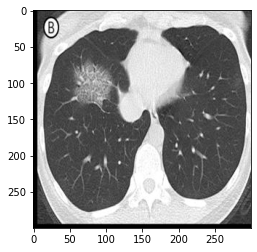

In [ ]:
# training_data
dataset_covid = [data_covid,label_covid]
#print(dataset_covid[0].shape)

dataset_nonCovid = [data_nonCovid,label_nonCovid]
#print(dataset_nonCovid[0].shape)

# combined dataset
train_data = dataset_covid + dataset_nonCovid

import random
random.shuffle(dataset)
#print(dataset)

img=immatrix_covid[2].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

In [ ]:
batch_size = 32
nb_classes = 3
nb_epoch = 20

nb_filters = 32
nb_pool = 2
nb_conv = 3

In [ ]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
# Pre processing data

(X, y) = (train_data[0],train_data[1])
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
 
 
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
# normalizing the data to help with the training
X_train /= 255
X_test /= 255
 
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (279, 1, 300, 300)
279 train samples
70 test samples


label :  [0. 1. 0.]


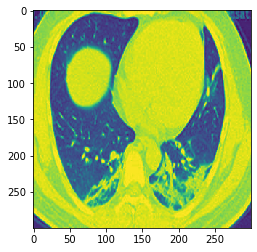

In [ ]:
## one-hot encoding using keras' numpy-related utilities
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
 
i = 128 #original 256
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        padding='same',
                        input_shape=(1, img_rows, img_cols)))
 
convout1 = Activation('relu')
model.add(convout1)
 
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, padding = 'same'))
convout2 = Activation('relu')
model.add(convout2)
 
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, padding = 'same'))
convout3 = Activation('relu')
model.add(convout3)
 
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool) , padding = 'same'))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
#Train the model and make predictions
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
            verbose=1, validation_data=(X_test, Y_test))

hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
              verbose=1, validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 2s 106ms/step - loss: 1.2351 - accuracy: 0.0210 - val_loss: 1.1848 - val_accuracy: 0.0000e+00
Epoch 2/20
9/9 [==============================] - 1s 73ms/step - loss: 1.2357 - accuracy: 0.0434 - val_loss: 1.1802 - val_accuracy: 0.0000e+00
Epoch 3/20
9/9 [==============================] - 1s 73ms/step - loss: 1.2283 - accuracy: 0.0133 - val_loss: 1.1757 - val_accuracy: 0.0000e+00
Epoch 4/20
9/9 [==============================] - 1s 73ms/step - loss: 1.2164 - accuracy: 0.0154 - val_loss: 1.1716 - val_accuracy: 0.0000e+00
Epoch 5/20
9/9 [==============================] - 1s 72ms/step - loss: 1.2320 - accuracy: 0.0133 - val_loss: 1.1676 - val_accuracy: 0.0000e+00
Epoch 6/20
9/9 [==============================] - 1s 74ms/step - loss: 1.2156 - accuracy: 0.0213 - val_loss: 1.1635 - val_accuracy: 0.0000e+00
Epoch 7/20
9/9 [==============================] - 1s 72ms/step - loss: 1.2032 - accuracy: 0.0192 - val_loss: 1.1596 - val_accuracy: 0.0000e+0

In [ ]:
print(hist.history)

{'loss': [1.1643146276474, 1.1532940864562988, 1.1615338325500488, 1.1530550718307495, 1.1531018018722534, 1.1531779766082764, 1.1508249044418335, 1.1532829999923706, 1.1420634984970093, 1.1427181959152222, 1.142391324043274, 1.1331344842910767, 1.1323869228363037, 1.1311055421829224, 1.1356103420257568, 1.1287660598754883, 1.1198534965515137, 1.1204125881195068, 1.13358736038208, 1.1236836910247803], 'accuracy': [0.1165919303894043, 0.13452914357185364, 0.12556053698062897, 0.12556053698062897, 0.1165919303894043, 0.1434977650642395, 0.09417040646076202, 0.17488789558410645, 0.16143497824668884, 0.14798206090927124, 0.17937219142913818, 0.1928251087665558, 0.17937219142913818, 0.1704035848379135, 0.18385650217533112, 0.18385650217533112, 0.22869955003261566, 0.219730943441391, 0.13901345431804657, 0.219730943441391], 'val_loss': [1.1192125082015991, 1.1171300411224365, 1.114933967590332, 1.112890362739563, 1.1107690334320068, 1.1087732315063477, 1.1067980527877808, 1.1049835681915283,

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


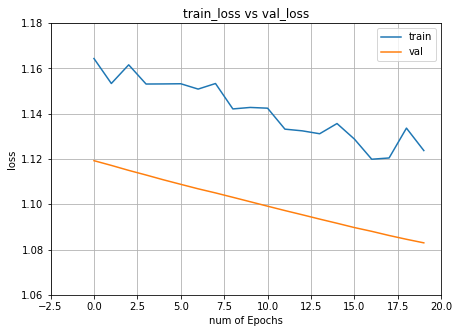

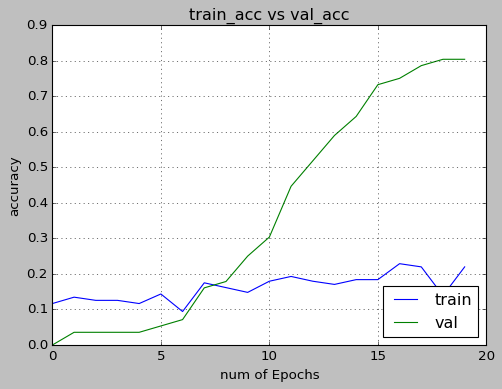

In [ ]:
# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(model.predict_classes(X_test[1:5]))
print(Y_test[1:5])

Test score: 1.080843210220337
Test accuracy: 0.9142857193946838
[1 1 1 1]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
  

p=model.predict_proba(X_test) # to predict probability

target_names = ['class 0(Negative)','class 0(Neutral)', 'class 2(Positive)']
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

                   precision    recall  f1-score   support

class 0(Negative)       0.00      0.00      0.00         0
 class 0(Neutral)       1.00      0.91      0.96        70
class 2(Positive)       0.00      0.00      0.00         0

         accuracy                           0.91        70
        macro avg       0.33      0.30      0.32        70
     weighted avg       1.00      0.91      0.96        70

[[ 0  0  0]
 [ 4 64  2]
 [ 0  0  0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
print("F1-score: {0}".format(f1_score(y_pred, y_test,pos_label='positive',average='micro') ) )
print("Precision: ",precision_score(y_pred, y_test,pos_label='positive',
                                           average='micro'))
print("Recall: ",recall_score(y_pred, y_test,pos_label='positive',
                                           average='micro'))
print("Accuracy: ",accuracy_score(y_pred,y_test))

F1-score: 0.9142857142857143
Precision:  0.9142857142857143
Recall:  0.9142857142857143
Accuracy:  0.9142857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
